# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [3]:
import pandas as pd 
import numpy as np
# 1. Đọc dữ liệu
data = pd.read_csv("data/tips.csv", header=0)
data.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# 2. Xoá cột `Unnamed: 0`
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
# 3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
data.shape
# 244 dòng, 7 thuộc tính

(244, 7)

In [51]:
# 4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
data.info()
# total_bill, tip, size là thuộc tính định lượng, còn lại là phân loại

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [53]:
# 5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
data.groupby(['sex']).size()
# nam: 87, nữ 157, tỉ lệ 87/157

sex
Female     87
Male      157
dtype: int64

In [55]:
# 6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
data.groupby(['smoker']).size()

smoker
No     151
Yes     93
dtype: int64

In [57]:
# 7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
data.groupby(['day']).size()

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

In [59]:
# 8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
data.groupby(['time']).size()
# bữa tối

time
Dinner    176
Lunch      68
dtype: int64

In [61]:
# 9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
data.groupby(['size']).size()
# 2 người

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

In [63]:
# 10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
data["size"].mean()

2.569672131147541

## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [85]:
# 1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?

data.count()
data["tip"].min()
# 100% tip

1.0

In [111]:
#3, Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
#data.groupby("sex")["tip"].mean()
data["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [9]:
# 4, Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
# data.groupby("smoker")["tip"].mean()
data["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [15]:
# Thống kê tổng số tiền tip nhận được theo ngày.
data.groupby("day")["tip"].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

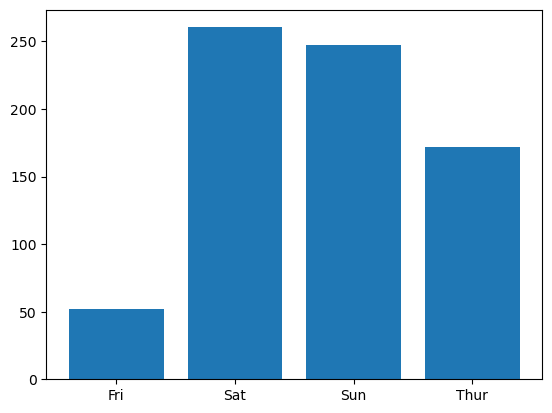

In [23]:
# Vẽ đồ thị thể hiện tổng tiền tip theo ngày
import matplotlib.pyplot as plt

tip_by_day = data.groupby("day")["tip"].sum()


plt.bar(tip_by_day.index, tip_by_day.values)
plt.show()

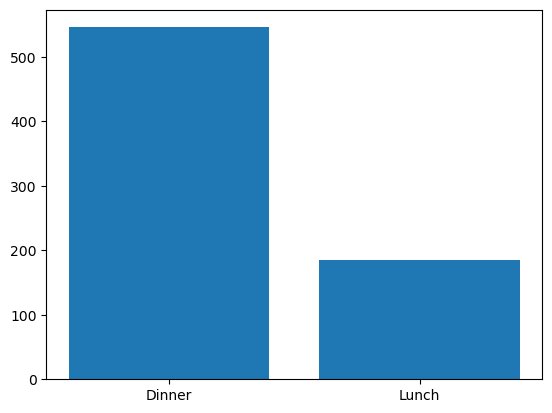

In [25]:
# Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn
import matplotlib.pyplot as plt

tip_by_day = data.groupby("time")["tip"].sum()


plt.bar(tip_by_day.index, tip_by_day.values)
plt.show()

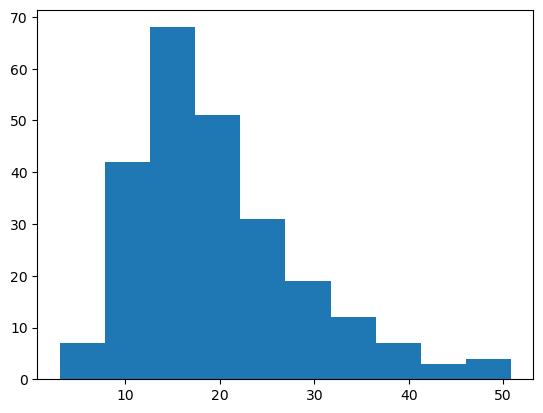

In [27]:
# Vẽ đồ thị histogram của tổng hoá đơn
plt.hist(data["total_bill"])
plt.show()

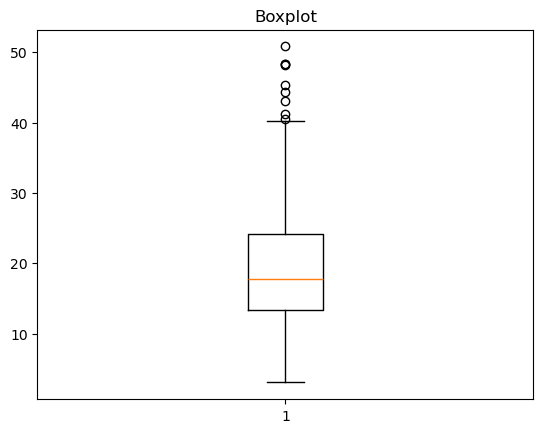

In [29]:
# Vẽ đồ thị boxplot của tổng hoá đơn
data1 = data["total_bill"]      

plt.boxplot(x=data1)
plt.title("Boxplot")

plt.show()

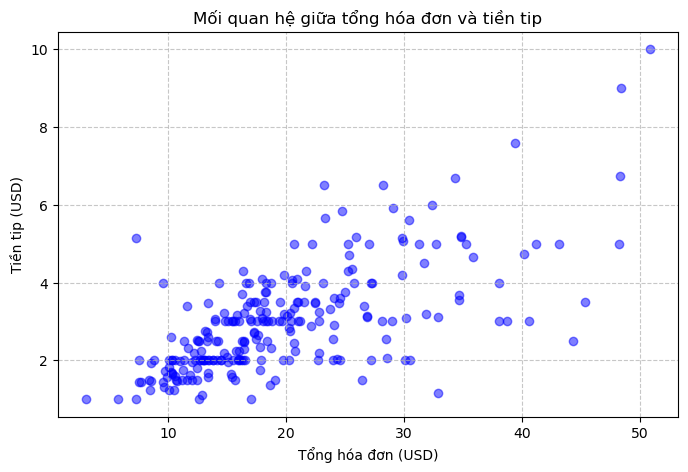

In [33]:
# Mối liên quan giữa tổng hóa đơn và tiền tip
import pandas as pd
import matplotlib.pyplot as plt

# Vẽ scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(data["total_bill"], data["tip"], color="blue", alpha=0.5)

# Thêm nhãn và tiêu đề
plt.xlabel("Tổng hóa đơn (USD)")
plt.ylabel("Tiền tip (USD)")
plt.title("Mối quan hệ giữa tổng hóa đơn và tiền tip")
plt.grid(True, linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()


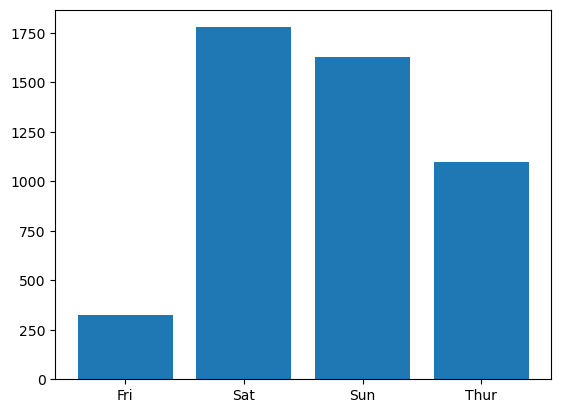

In [37]:
# So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
total_bill_by_day = data.groupby("day")["total_bill"].sum()
plt.bar(total_bill_by_day.index, total_bill_by_day.values)
plt.show()